## Homework_16 神经网络基础   
教师：胡俊峰



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## 第二部分：神经网络基础(5分)

2.1补全下列常用的激活函数及其导数,熟记并画出它们的图像（2分），你也可以查阅资料后补充一些其它常用的激活函数（不计分）

In [2]:
def sigmoid(x):
    # TODO
    return 1.0/(1.0 + np.exp(-x))

def d_sigmoid(x):
    # TODO
    return sigmoid(x) * (1 - sigmoid(x))

def ReLU(x):
    # TODO
    return x * (x > 0).astype(int)

def d_ReLU(x):
    # TODO
    return (x > 0).astype(int)

def Tanh(x):
    # TODO
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def d_Tanh(x):
    # TODO
    return ((np.exp(x) + np.exp(-x)) ** 2 - (np.exp(x) - np.exp(-x)) ** 2) / (np.exp(x) + np.exp(-x))


Text(0.5, 1.0, 'd_tanh')

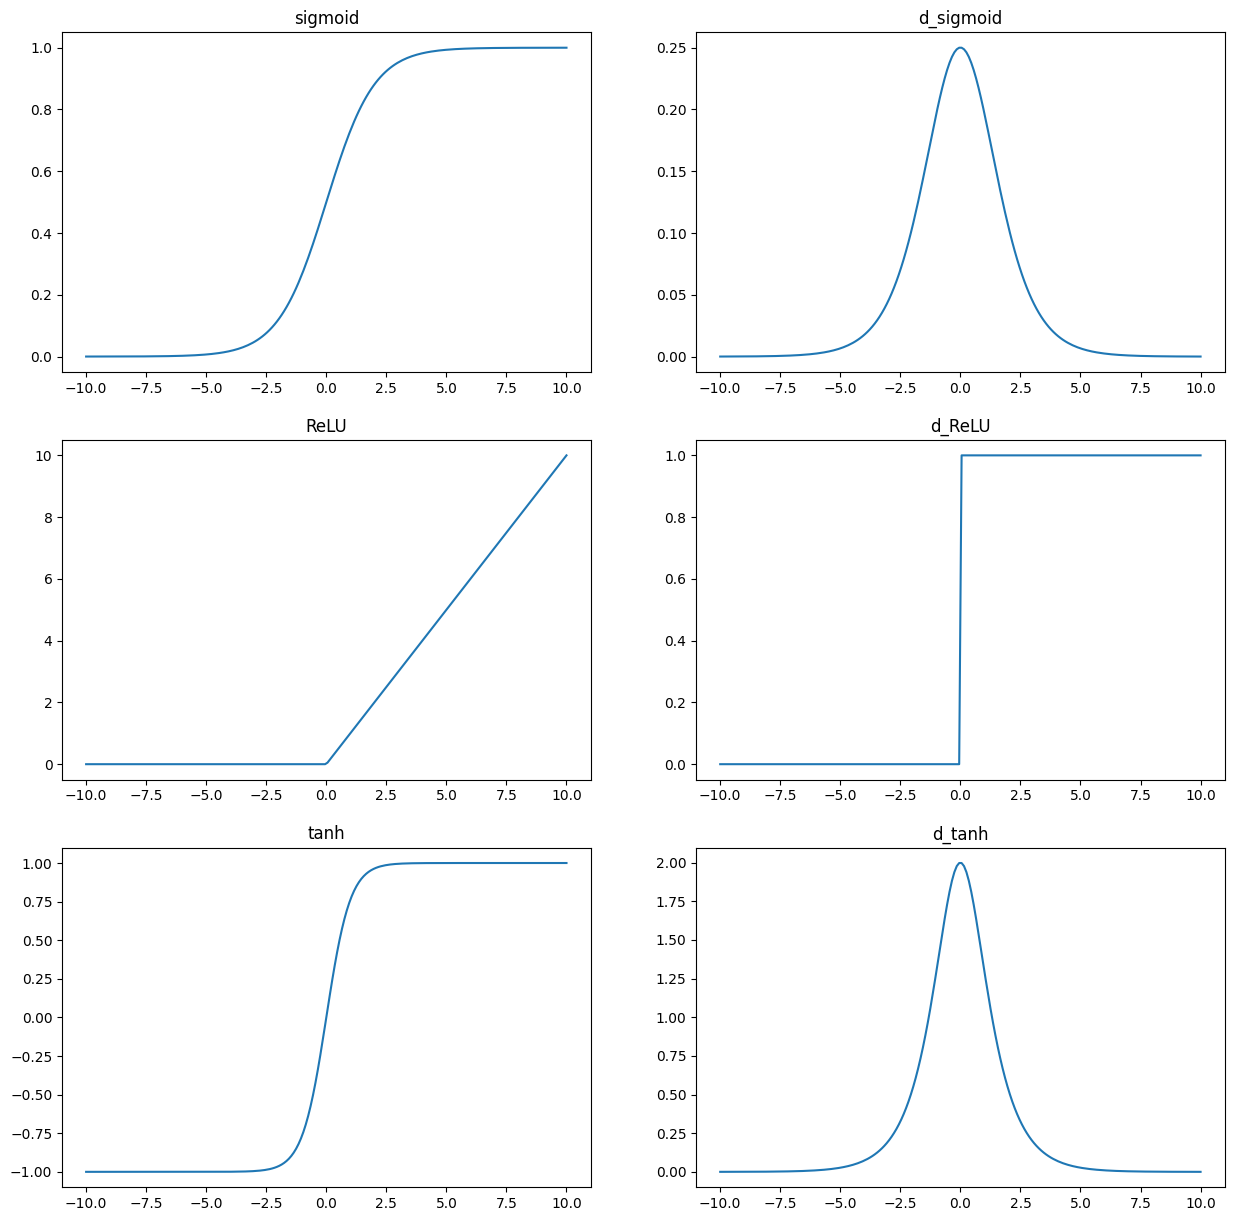

In [3]:
#画出上述常用激活函数与对应导数在区间[-10,10]的图像
# TODO
x = np.linspace(-10, 10, 200)
fig, ax = plt.subplots(3, 2, figsize=(15,15))
ax[0, 0].plot(x, sigmoid(x))
ax[0, 0].set_title("sigmoid")
ax[0, 1].plot(x, d_sigmoid(x))
ax[0, 1].set_title("d_sigmoid")
ax[1, 0].plot(x, ReLU(x))
ax[1, 0].set_title("ReLU")
ax[1, 1].plot(x, d_ReLU(x))
ax[1, 1].set_title("d_ReLU")
ax[2, 0].plot(x, Tanh(x))
ax[2, 0].set_title("tanh")
ax[2, 1].plot(x, d_Tanh(x))
ax[2, 1].set_title("d_tanh")


2.2使用反向传播算法，用三次函数拟合sin(x)函数在$[-\pi,\pi]$区间的取值（3分）

In [4]:
#在区间等距离散采样
x = np.linspace(-math.pi,math.pi,200)
y = np.sin(x)

In [5]:
#初始化a+b*x+c*x^2+d*x^3中的参数a,b,c,d
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-5    #可尝试对比不同的学习率，不计分

In [6]:
for t in range(6000):
    y_pred = a + b*x + c*x**2 + d*x**3
    
    #计算loss（0.5分）
    # TODO
    loss = (np.square(y_pred-y)).sum()
 
    print(t, loss)
    
    #反向传播（1分）
    # TODO
    grad_y_pred = 2.0 * (y_pred-y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x ).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
 
    # 更新参数（1分）
    # TODO
    a = a -grad_a*learning_rate
    b = b - grad_b*learning_rate
    c = c - grad_c*learning_rate
    d = d - grad_d*learning_rate
 
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')


0 24003.57868360866
1 4474.718614560237
2 978.0801866955297
3 347.6591860151069
4 230.2717081456323
5 205.2326352093307
6 197.2537698568467
7 192.79269042997683
8 189.3558529261057
9 186.43586334082758
10 183.88997803132386
11 181.64878900059756
12 179.6628791739785
13 177.89220875354292
14 176.3033078824771
15 174.8680072688296
16 173.5625640836213
17 172.36696002499883
18 171.26431575008266
19 170.24039827573222
20 169.28320584592637
21 168.38261795039077
22 167.53010024581724
23 166.7184557626966
24 165.94161513671182
25 165.194459743338
26 164.47267257459757
27 163.77261250647854
28 163.09120828807912
29 162.42586915903493
30 161.77440948700237
31 161.13498522608944
32 160.5060403420612
33 159.88626164098514
34 159.27454068319813
35 158.66994167122832
36 158.0716743746297
37 157.4790713016663
38 156.8915684517069
39 156.30868908668015
40 155.73003004803584
41 155.15525021993764
42 154.58406080204162
43 154.01621710801777
44 153.4515116504953
45 152.8897683106498
46 152.330837422301

画出得到的三次函数与sinx在$[-\pi,\pi]$区间内的图像(0.5分)

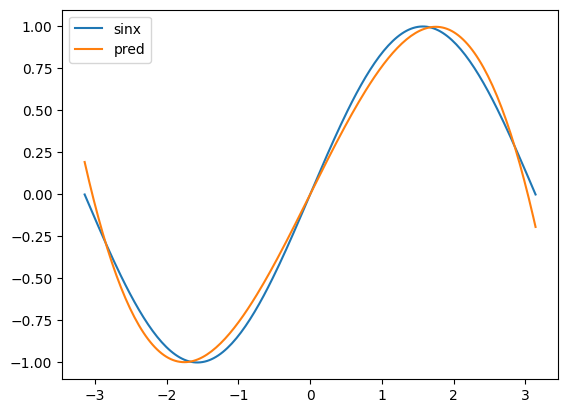

In [7]:
# TODO
plt.plot(x, y)
plt.plot(x, y_pred)
plt.legend(["sinx", "pred"])